In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import locale
import nltk
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from IPython.display import display
nltk.download("stopwords")
nltk.download("punkt")
locale.setlocale( locale.LC_ALL, 'es_ES.UTF-8') 
plt.rcParams["figure.figsize"] = (16,9)

[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
catalogo = pd.read_csv("data/catalogo_26_04_2022_utf_converted.csv", sep=";")
catalogo["Descargas"] = catalogo["Descargas"].apply(lambda x: locale.atoi(x.replace(".", "")))
display(catalogo.shape)
catalogo.head()

(530, 13)

,Nombre,Sector,Palabras clave:,Fecha de incorporación al catálogo:,Última actualización de los metadatos:,Frecuencia de actualización:,Responsable del conjunto de datos:,Editor:,Licencia:,Lugar:,Formatos,Descargas,URL
0,Unidades luminosas (Farolas),energia,NaN,20/04/2022,NaN,semestral,Dirección General de Conservación de Vías Públ...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","csv,xls,shp,",61,https://datos.madrid.es/portal/site/egob/menui...
1,Colegios Públicos de Madrid: estudios sobre lo...,educacion,NaN,08/04/2022,NaN,anual,Dirección General de Coordinación Territorial ...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","csv,",39,https://datos.madrid.es/portal/site/egob/menui...
2,Estudio de satisfacción con el servicio de la ...,sociedad-bienestar,NaN,31/03/2022,NaN,anual,"Dirección General de Familias, Infancia, Educa...",Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","xls,",21,https://datos.madrid.es/portal/site/egob/menui...
3,Encuesta de Satisfacción de las personas usuar...,sociedad-bienestar,NaN,28/03/2022,NaN,anual,"Dirección General de Bibliotecas, Archivos y M...",Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","xls,",82,https://datos.madrid.es/portal/site/egob/menui...
4,Encuesta de satisfacción de las personas usuar...,sociedad-bienestar,NaN,28/03/2022,NaN,anual,"Dirección General de Bibliotecas, Archivos y M...",Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","xls,",73,https://datos.madrid.es/portal/site/egob/menui...


<AxesSubplot:xlabel='conjuntos'>

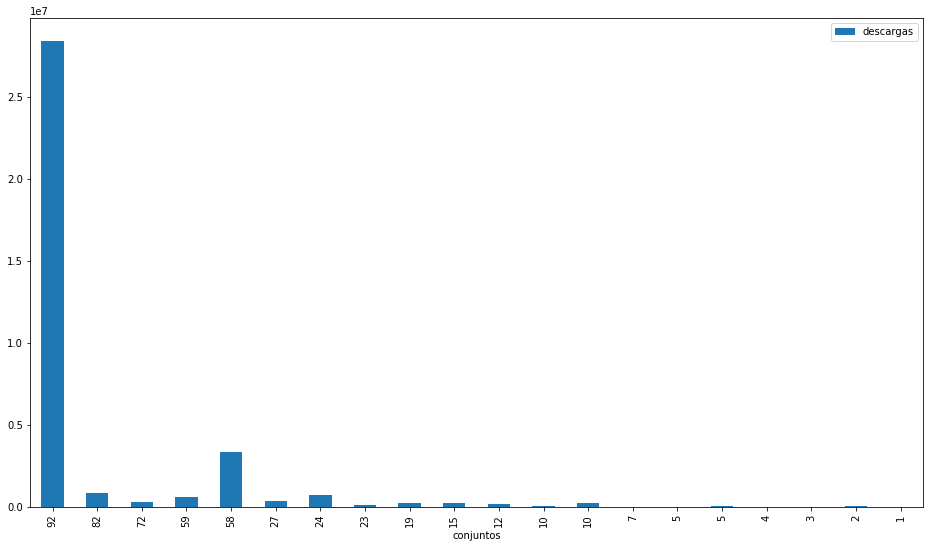

In [3]:
sectores = catalogo.groupby("Sector").agg({"Nombre": "count", "Descargas": "sum"}, axis=1).rename({"Nombre": "conjuntos", "Descargas": "descargas"}, axis=1).sort_values("conjuntos", ascending=False)
sectores.plot("conjuntos", kind="bar")

<AxesSubplot:xlabel='conjuntos', ylabel='descargas'>

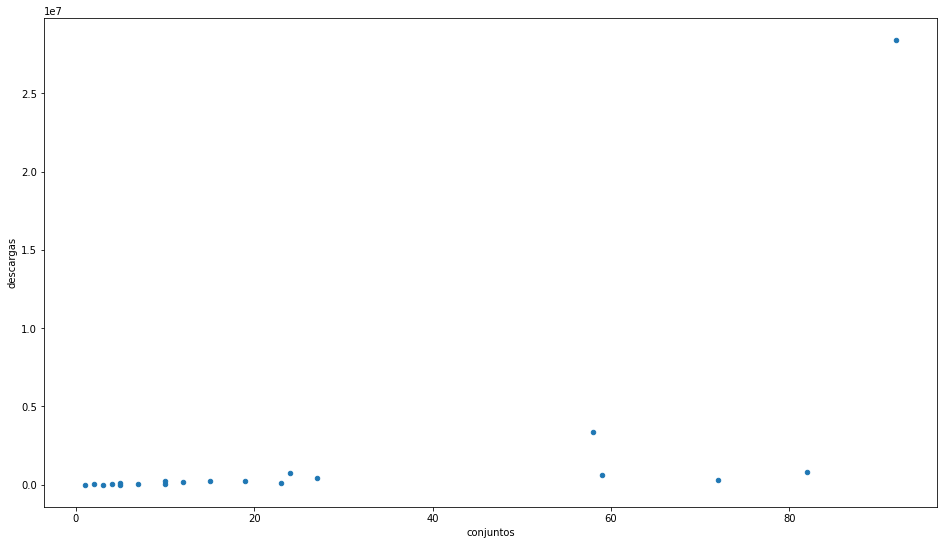

In [4]:
sectores.plot.scatter("conjuntos", "descargas")

In [5]:
sectores["descargas_promedio"] = sectores.apply(lambda x: x.conjuntos / float(x.descargas), axis=1)

In [6]:
sectores

,conjuntos,descargas,descargas_promedio
Sector,,,
transporte,92,28413057,0.000003
sector-publico,82,829296,0.000099
sociedad-bienestar,72,305743,0.000235
urbanismo-infraestructuras,59,642624,0.000092
medio-ambiente,58,3348445,0.000017
deporte,27,397376,0.000068
cultura-ocio,24,758817,0.000032
salud,23,129145,0.000178
hacienda,19,240697,0.000079


In [7]:
sectores.sort_values("descargas_promedio", ascending=False)

,conjuntos,descargas,descargas_promedio
Sector,,,
energia,5,5535,0.000903
vivienda,3,3376,0.000889
empleo,4,11015,0.000363
economia,7,20242,0.000346
sociedad-bienestar,72,305743,0.000235
legislacion-justicia,1,4267,0.000234
salud,23,129145,0.000178
turismo,10,59212,0.000169
sector-publico,82,829296,0.000099


<AxesSubplot:xlabel='conjuntos', ylabel='descargas_promedio'>

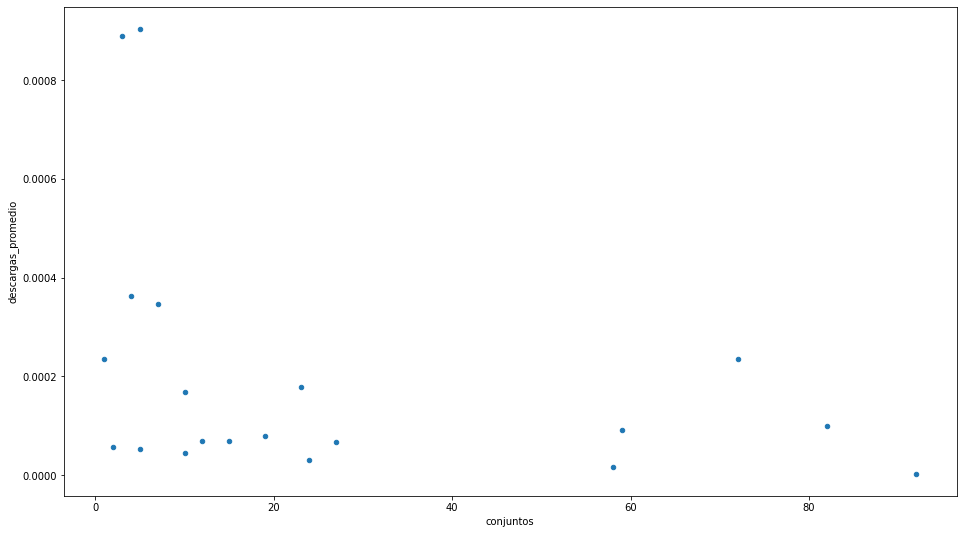

In [8]:
sectores.plot.scatter("conjuntos", "descargas_promedio")

In [9]:
sectores.corr()

,conjuntos,descargas,descargas_promedio
conjuntos,1.000000,0.582392,-0.351659
descargas,0.582392,1.000000,-0.214135
descargas_promedio,-0.351659,-0.214135,1.000000


In [59]:
sectores.sort_values("descargas_promedio", ascending=False)

,conjuntos,descargas,descargas_promedio
Sector,,,
energia,5,5535,0.000903
vivienda,3,3376,0.000889
empleo,4,11015,0.000363
economia,7,20242,0.000346
sociedad-bienestar,72,305743,0.000235
legislacion-justicia,1,4267,0.000234
salud,23,129145,0.000178
turismo,10,59212,0.000169
sector-publico,82,829296,0.000099


In [11]:
catalogo.sort_values("Descargas", ascending=False).head()

,Nombre,Sector,Palabras clave:,Fecha de incorporación al catálogo:,Última actualización de los metadatos:,Frecuencia de actualización:,Responsable del conjunto de datos:,Editor:,Licencia:,Lugar:,Formatos,Descargas,URL
148,Aparcamientos públicos (Rotacionales). Datos d...,transporte,NaN,25/03/2019,NaN,tiemporeal,Dirección General de Planificación e Infraestr...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","api,",17067593,https://datos.madrid.es/portal/site/egob/menui...
521,Tráfico. Mapa de tramas de intensidad del tráfico,transporte,NaN,08/08/2014,NaN,tiemporeal,Dirección General de Gestión y Vigilancia de l...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","kml,",5635432,https://datos.madrid.es/portal/site/egob/menui...
451,Calidad del aire. Datos en tiempo real,medio-ambiente,NaN,09/04/2015,01/10/2015 00:00,tiemporeal,Dirección General de Sostenibilidad y Control ...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","csv,txt,xml,",1915237,https://datos.madrid.es/portal/site/egob/menui...
518,Tráfico. Datos del tráfico en tiempo real,transporte,"Movilidad y Transportes,Circulación",12/03/2014,12/06/2018 00:00,tiemporeal,Dirección General de Gestión y Vigilancia de l...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","xml,",1102985,https://datos.madrid.es/portal/site/egob/menui...
514,Tráfico. Incidencias en vía pública. Mapa,transporte,NaN,08/08/2014,NaN,tiemporeal,Dirección General de Gestión y Vigilancia de l...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","kml,",976112,https://datos.madrid.es/portal/site/egob/menui...


In [12]:
catalogo[~pd.isna(catalogo["Palabras clave:"])]

,Nombre,Sector,Palabras clave:,Fecha de incorporación al catálogo:,Última actualización de los metadatos:,Frecuencia de actualización:,Responsable del conjunto de datos:,Editor:,Licencia:,Lugar:,Formatos,Descargas,URL
12,Presupuestos. Ejecución mensual ejercicio en c...,hacienda,"Información financiera y presupuestaria,Hacienda",03/03/2022,NaN,mensual,Dirección General de Presupuestos,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","csv,xls,",877,https://datos.madrid.es/portal/site/egob/menui...
25,Obras públicas planificadas y en ejecución,urbanismo-infraestructuras,Urbanismo e infraestructuras,18/01/2022,NaN,sindefinir,"Dirección General del Espacio Público, Obras e...",Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","shp,",371,https://datos.madrid.es/portal/site/egob/menui...
29,Zona de Bajas Emisiones de Especial Protección...,transporte,Urbanismo e infraestructuras,28/10/2021,NaN,sindefinir,Dirección General de Sostenibilidad y Control ...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","xls,shp,",239,https://datos.madrid.es/portal/site/egob/menui...
40,Relación de Puestos de Trabajo (RPT) del Ayunt...,sector-publico,Personal,21/04/2021,NaN,trimestral,Dirección General de Costes y Gestión de Personal,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","csv,",1920,https://datos.madrid.es/portal/site/egob/menui...
41,Presupuestos. Ejecución mensual ejercicio en c...,hacienda,"Información financiera y presupuestaria,Hacienda",12/03/2020,NaN,mensual,Dirección General de Presupuestos,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","csv,xls,",8190,https://datos.madrid.es/portal/site/egob/menui...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Tráfico. Intensidad media en días laborables,transporte,"Movilidad y Transportes,Circulación",15/04/2014,NaN,trimestral,Dirección General de Planificación e Infraestr...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","xls,",5709,https://datos.madrid.es/portal/site/egob/menui...
518,Tráfico. Datos del tráfico en tiempo real,transporte,"Movilidad y Transportes,Circulación",12/03/2014,12/06/2018 00:00,tiemporeal,Dirección General de Gestión y Vigilancia de l...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","xml,",1102985,https://datos.madrid.es/portal/site/egob/menui...
519,Tráfico. Histórico de datos del tráfico desde ...,transporte,"Movilidad y Transportes,Circulación",26/09/2014,NaN,mensual,Dirección General de Gestión y Vigilancia de l...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","csv,zip,",82721,https://datos.madrid.es/portal/site/egob/menui...
522,Tráfico. Semáforos con control Foto-Rojo,transporte,Circulación,15/04/2014,01/02/2016 00:00,anual,Dirección General de Gestión y Vigilancia de l...,Ayuntamiento de Madrid,https://datos.madrid.es/egob/catalogo/aviso-legal,"Madrid,","csv,xls,shp,geo,",74875,https://datos.madrid.es/portal/site/egob/menui...


In [13]:
catalogo["Nombre"]

0                           Unidades luminosas (Farolas)
1      Colegios Públicos de Madrid: estudios sobre lo...
2      Estudio de satisfacción con el servicio de la ...
3      Encuesta de Satisfacción de las personas usuar...
4      Encuesta de satisfacción de las personas usuar...
                             ...                        
525             Urbanismo. Destino urbanístico del suelo
526    Zona de Bajas Emisiones de Especial Protección...
527    Zonas del Servicio de Estacionamiento Regulado...
528                                        Áreas caninas
529    Áreas de Prioridad Residencial APR (Informació...
Name: Nombre, Length: 530, dtype: object

In [14]:
catalogo.groupby("Frecuencia de actualización:").count()[["Nombre"]].sort_values("Nombre", ascending=False)

,Nombre
Frecuencia de actualización:,
anual,203
mensual,95
trimestral,83
sindefinir,69
diaria,29
semestral,23
tiemporeal,22
semanal,5
quincenal,1


In [21]:
stops = stopwords.words("spanish")
def tokenize(texts):
    tokens = []
    if type(texts) == str:
        texts = [texts]
    for text in texts:
        if type(text) == str:
            for token in word_tokenize(text):
                if token not in stops and token.isalnum():
                    tokens.append(token.lower())
    return tokens

In [22]:
catalogo["tokens"] = catalogo.apply(lambda row: tokenize([row["Nombre"], row["Palabras clave:"]]), axis=1)

In [23]:
token_counter = Counter()
for (_, row) in catalogo.iterrows():
    token_counter.update(row.tokens)

In [24]:
token_counter.most_common(10)

[('madrid', 123),
 ('ayuntamiento', 48),
 ('municipales', 46),
 ('satisfacción', 45),
 ('tráfico', 43),
 ('datos', 39),
 ('personas', 36),
 ('centros', 36),
 ('estudio', 32),
 ('municipal', 32)]

In [33]:
for (ix, row) in catalogo.sort_values("Descargas").head(10).iterrows():
    print("  - " + row.Nombre + " (" + str(row.Descargas) + " descargas - " + row.URL + ")")

  - Estudio de satisfacción con el servicio de la Residencia Internado San Ildefonso de los menores residentes y de sus familias (21 descargas - https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=1158ee113cfdf710VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)
  - Encuesta de Satisfacción a personas atendidas en Información Urbanística e Información de Disciplina y Sancionadora en la Oficina de Atención a la Ciudadanía (32 descargas - https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=33f27555c126f710VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)
  - Colegios Públicos de Madrid: estudios sobre los patios escolares (39 descargas - https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=98c36cc09a800810VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100

In [47]:
sector_tokens = catalogo.groupby("Sector").agg({"tokens": "sum"}).explode("tokens").reset_index().groupby(["tokens", "Sector"]).Sector.count().unstack().fillna(0)
sector_tokens

Sector,ciencia-tecnologia,comercio,cultura-ocio,demografia,deporte,economia,educacion,empleo,energia,hacienda,legislacion-justicia,medio-ambiente,salud,sector-publico,seguridad,sociedad-bienestar,transporte,turismo,urbanismo-infraestructuras,vivienda
tokens,,,,,,,,,,,,,,,,,,,,
010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zonas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
ámbito,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ámbitos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [54]:
for col in sector_tokens.columns:
    display(sector_tokens.sort_values(col, ascending=False)[[col]].head())

Sector,ciencia-tecnologia
tokens,
sedes,1.0
wifi,1.0
comunicaciones,1.0
gratuitas,1.0
institutos,1.0


Sector,comercio
tokens,
comercio,4.0
consumo,4.0
actividades,3.0
locales,3.0
empresas,3.0


Sector,cultura-ocio
tokens,
bibliotecas,10.0
ocio,9.0
cultura,8.0
madrid,7.0
actividades,5.0


Sector,demografia
tokens,
distrito,3.0
según,2.0
estadística,2.0
explotación,2.0
padrón,2.0


Sector,deporte
tokens,
deportes,29.0
deportivas,9.0
municipales,8.0
temporada,6.0
participantes,6.0


Sector,economia
tokens,
madrid,4.0
economía,2.0
emprende,2.0
agenda,2.0
municipales,1.0


Sector,educacion
tokens,
centros,4.0
educación,3.0
colegios,3.0
municipales,3.0
madrid,3.0


Sector,empleo
tokens,
empleo,4.0
agencia,3.0
oposiciones,1.0
inscripciones,1.0
personas,1.0


Sector,energia
tokens,
energía,3.0
generación,2.0
edificios,2.0
municipales,2.0
consumo,2.0


Sector,hacienda
tokens,
hacienda,10.0
presupuestaria,9.0
financiera,6.0
información,6.0
presupuestos,5.0


Sector,legislacion-justicia
tokens,
normativa,1.0
municipal,1.0
010,0.0
ozono,0.0
panel,0.0


Sector,medio-ambiente
tokens,
datos,16.0
calidad,9.0
medio,8.0
ambiente,8.0
verdes,7.0


Sector,salud
tokens,
salud,12.0
madrid,10.0
encuesta,9.0
satisfacción,9.0
serie,9.0


Sector,sector-publico
tokens,
madrid,39.0
ayuntamiento,30.0
elecciones,13.0
personal,11.0
trabajo,10.0


Sector,seguridad
tokens,
bomberos,9.0
municipal,5.0
policía,5.0
cuerpo,3.0
vía,2.0


Sector,sociedad-bienestar
tokens,
satisfacción,30.0
estudio,27.0
personas,25.0
centros,20.0
usuarias,18.0


Sector,transporte
tokens,
tráfico,43.0
transportes,17.0
servicio,12.0
datos,12.0
movilidad,12.0


Sector,turismo
tokens,
madrid,10.0
ciudad,8.0
turístico,4.0
perfil,3.0
turismo,3.0


Sector,urbanismo-infraestructuras
tokens,
urbanismo,12.0
infraestructuras,11.0
municipales,10.0
municipal,10.0
madrid,9.0


Sector,vivienda
tokens,
vivienda,3.0
viviendas,3.0
empresa,3.0
suelo,3.0
emvs,3.0
